In [45]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit

In [70]:
data=pd.read_csv('heart.csv')

In [47]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [27]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [44]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [105]:
X= data[['Sex','Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
        'MaxHR', 'Oldpeak', 'RestingECG','ExerciseAngina','ST_Slope','HeartDisease']]
del X ['HeartDisease']      
y=pd.Series(data=data['HeartDisease'])
     
X.head()

,Sex,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,RestingECG,ExerciseAngina,ST_Slope
0,M,40,ATA,140,289,0,172,0.0,Normal,N,Up
1,F,49,NAP,160,180,0,156,1.0,Normal,N,Flat
2,M,37,ATA,130,283,0,98,0.0,ST,N,Up
3,F,48,ASY,138,214,0,108,1.5,Normal,Y,Flat
4,M,54,NAP,150,195,0,122,0.0,Normal,N,Up


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape

((734, 11), (184, 11))

In [107]:
categorials = X.select_dtypes('object').columns
categorials

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [108]:
integer = X_train.select_dtypes(['int64', 'float64']).columns.tolist()

X_train[integer].head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
795,42,120,240,1,194,0.8
25,36,130,209,0,178,0.0
84,56,150,213,1,125,1.0
10,37,130,211,0,142,0.0
344,51,120,0,1,104,0.0


In [110]:
dummy_train = pd.get_dummies(X_train[categorials], columns=categorials)
dummy_test = pd.get_dummies(X_test[categorials], columns=categorials)

dummy_cols = list(set(dummy_train) & set(dummy_test))

dummy_train = dummy_train[dummy_cols]
dummy_test = dummy_test[dummy_cols]

X_train = pd.concat([X_train[integer].fillna(-999), dummy_train], axis=1)

X_test = pd.concat([X_test[integer].fillna(-999),dummy_test], axis=1)
X_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_TA,ST_Slope_Flat,ChestPainType_ATA,Sex_F,RestingECG_Normal,RestingECG_LVH,ExerciseAngina_Y,ChestPainType_NAP,ST_Slope_Up,ST_Slope_Down,RestingECG_ST,Sex_M,ExerciseAngina_N,ChestPainType_ASY
795,42,120,240,1,194,0.8,0,0,0,0,1,0,0,1,0,1,0,1,1,0
25,36,130,209,0,178,0.0,0,0,0,0,1,0,0,1,1,0,0,1,1,0
84,56,150,213,1,125,1.0,0,1,0,0,1,0,1,0,0,0,0,1,0,1
10,37,130,211,0,142,0.0,0,0,0,1,1,0,0,1,1,0,0,0,1,0
344,51,120,0,1,104,0.0,0,1,0,0,1,0,0,0,0,0,0,1,1,1


In [112]:
from sklearn.ensemble import  BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [170]:
dt = DecisionTreeRegressor(random_state=10)
dt.fit(X_train, y_train)
dt.score(X_train, y_train)

1.0

In [171]:
dt.score(X_test, y_test)

0.17368612695715513

In [133]:
bagging = BaggingRegressor(DecisionTreeRegressor(),
                           n_estimators=150,
                           max_samples=0.5,
                           max_features=0.5,
                           random_state=10)

In [134]:
bagging.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_features=0.5,
                 max_samples=0.5, n_estimators=150, random_state=10)

In [135]:
bagging.score(X_train, y_train)

0.8354974453190012

In [136]:
bagging.score(X_test, y_test)

0.5547652818749658

In [137]:
clf_rf = RandomForestRegressor(random_state=10)
clf_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [138]:
clf_rf.score(X_train, y_train)

0.9363419229703519

In [139]:
clf_rf.score(X_test, y_test)

0.6006648379657726

In [140]:
imp = pd.Series(clf_rf.feature_importances_)

In [141]:
imp.index = pd.Series(X_train.columns)

In [142]:
imp = imp.sort_values(ascending=False)
imp

ST_Slope_Up          0.396978
Cholesterol          0.097174
MaxHR                0.087206
Oldpeak              0.084914
Age                  0.074471
RestingBP            0.061673
ChestPainType_ASY    0.052994
ExerciseAngina_N     0.028629
Sex_F                0.019588
Sex_M                0.018115
ExerciseAngina_Y     0.017834
FastingBS            0.015950
RestingECG_LVH       0.009342
RestingECG_Normal    0.007584
RestingECG_ST        0.006511
ChestPainType_ATA    0.006086
ChestPainType_NAP    0.005303
ChestPainType_TA     0.003790
ST_Slope_Flat        0.003282
ST_Slope_Down        0.002578
dtype: float64

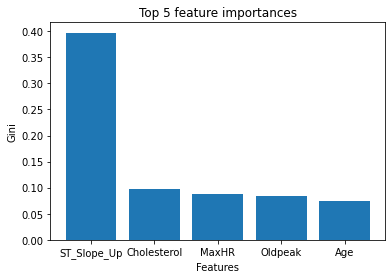

In [143]:
plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.head().index, imp.head())
plt.show()

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeCV

In [154]:
Regressor = StackingRegressor(
    [
        ('LinearRegression', LinearRegression()),
        ('Randomforest',RandomForestRegressor()),
        ('DecisionTree', DecisionTreeRegressor())
    ], RidgeCV())

In [155]:
Regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('LinearRegression', LinearRegression()),
                              ('Randomforest', RandomForestRegressor()),
                              ('DecisionTree', DecisionTreeRegressor())],
                  final_estimator=RidgeCV(alphas=array([ 0.1,  1. , 10. ])))

In [157]:
print(f'Score on train  {Regressor.score(X_train, y_train)}')
print(f'Score on test  {Regressor.score(X_test, y_test)}')

Score on train  0.7321337140925359
Score on test  0.5751530066070324


In [158]:
for i in Regressor.named_estimators:
    print(f'Score on train  with model {i} {Regressor.named_estimators_[i].score(X_train, y_train)}')
    print(f'Score on test  with model {i} {Regressor.named_estimators_[i].score(X_test, y_test)}')

Score on train  with model LinearRegression 0.5826525384883001
Score on test  with model LinearRegression 0.530038793456355
Score on train  with model Randomforest 0.9359780368897576
Score on test  with model Randomforest 0.6020986041995389
Score on train  with model DecisionTree 1.0
Score on test  with model DecisionTree 0.15135331957761877


Лучше всего справилась модель-случайный лес,дерево решений переобучилось